# CAP 6619 - Deep Learning
## Dr Marques
## Project 2

Deep learning solutions for:
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

Total number of points: 100 (+ 15 optional bonus points), as indicated.

**Include your name here:** (enter your name here)

**Include 'shared link' to 'your' final version of this NB here:** (enter link from above right here)

*Expand all notebook bocks/sections and ensure code has properly executed, save as pdf(above left menu) when completed to submit to Canvas.*

Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb
- https://developers.google.com/machine-learning/guides/text-classification/
- https://keras.io/api/datasets/boston_housing/


##### **Cite your sources** *(OPTIONAL if none used beyond those above)*

Add your own sources and references here.

## Setup

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture.

### Load and prepare the data

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

#### Model definition

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [ ]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [ ]:
history = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 62ms/step - loss: 0.5381 - accuracy: 0.7789 - val_loss: 0.4109 - val_accuracy: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3354 - accuracy: 0.8936 - val_loss: 0.3217 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2515 - accuracy: 0.9163 - val_loss: 0.2867 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2060 - accuracy: 0.9288 - val_loss: 0.2809 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1732 - accuracy: 0.9444 - val_loss: 0.2771 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1470 - accuracy: 0.9533 - val_loss: 0.2817 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1284 - accuracy: 0.9586 - val_loss: 0.3400 - val_accuracy: 0.8687
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

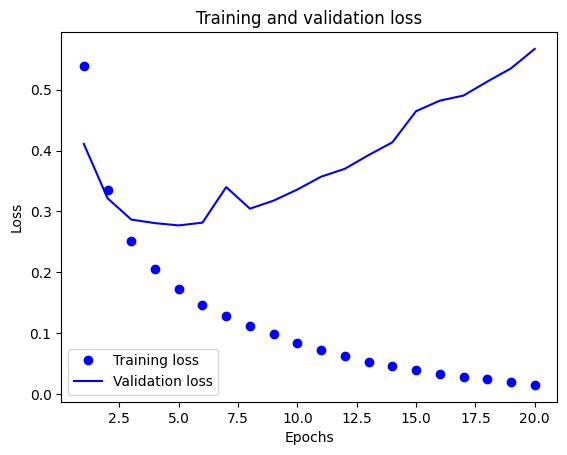

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

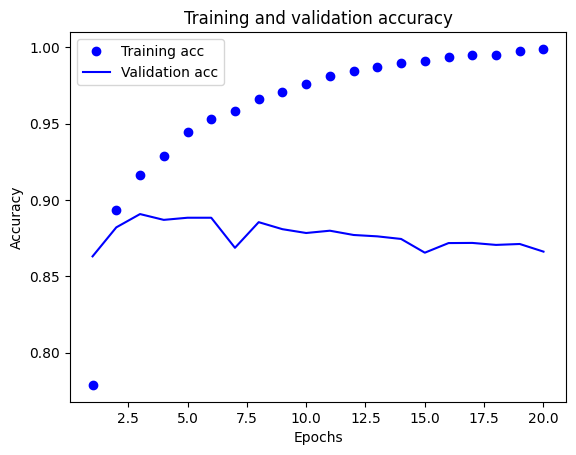

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Testing the model

In [ ]:
results = model1.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6161 - accuracy: 0.8560


In [ ]:
results

[0.6160885691642761, 0.8560400009155273]

## **PART 1** - *Your Turn*

### **Part 1 - Tasks:**

**1.1  &emsp;(*required*) - 10 points each**

 &emsp;**1.1.1** What type of preprocessing was applied to the raw input data? Why was it necessary to do so?

 &emsp;**1.1.2** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**1.1.3** Is accuracy a good metric of success in this case? Why (not)?

**1.2 &emsp;(*optional*) - 2 bonus points each**

 &emsp;**1.2.1** Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

 &emsp;**1.2.2** Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

 &emsp;**1.2.3** Comment on the mistakes and what you believe might have caused each of them.

 &emsp;**1.2.4** Write code to try different combinations of:

 - numbers of hidden layers and units per layer

 - loss functions

 - activation functions

 Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### **Part 1.1 - Required Tasks:**   *(responses)*

In the code provided, the preprocessing applied to the raw input data includes:

The data was loaded using the imdb.load_data() function from the Keras IMDB dataset, which retrieves the IMDB movie reviews dataset. It downloads the data and splits it into training and testing sets.
The reviews are encoded as sequences of integers, where each integer represents a specific word in the review. This encoding allows the model to work with discrete values.
The reviews are then vectorized using multi-hot encoding, where each review is represented as a binary vector of length 10,000, with a 1 indicating the presence of a word and a 0 indicating its absence. This encoding converts the data into a format that can be processed by the neural network.
The preprocessing steps are necessary to prepare the data for the neural network model. By encoding the reviews as sequences of integers and vectorizing them, the data is transformed into a numerical representation that can be fed into the neural network for training and prediction.

 Based on the training and validation loss curves, it seems that the model may suffer from overfitting. The training loss continues to decrease, while the validation loss starts to increase after a certain number of epochs.

To address overfitting, several techniques can be applied:

Use regularization techniques such as L1 or L2 regularization to add a penalty term to the loss function, encouraging the model to learn simpler patterns and reduce overfitting.
Dropout regularization can be added between the layers to randomly deactivate some neurons during training, forcing the network to learn more robust representations.
Reduce the complexity of the model by decreasing the number of layers or the number of hidden units in each layer. This can help prevent the model from memorizing the training data too well.
Increase the size of the training dataset if possible. More data can provide the model with a better understanding of the underlying patterns and reduce overfitting.

Accuracy can be a good metric to evaluate the performance of a binary classification model like this, but it may not be the best metric in all cases. In this case, accuracy represents the proportion of correctly classified reviews (both positive and negative) out of the total number of reviews.

However, in some cases, accuracy can be misleading, especially when the dataset is imbalanced. For example, if there is a significant imbalance between positive and negative reviews, a model that predicts all reviews as positive may still achieve a high accuracy if the majority of the reviews are positive. In such cases, it is essential to consider other metrics such as precision, recall, and F1-score, which provide a more detailed understanding of the model's performance.

Additionally, depending on the specific requirements or objectives of the application, different metrics may be more relevant. For example, if the goal is to minimize false negatives (misclassifying negative reviews as positive), recall may be a more important metric. It is crucial to choose the evaluation metrics based on the specific context and requirements of the problem at hand.

#### **Part 1.2 - Optional Tasks:** *(responses & code)*

**1.2.1**

> Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

In [ ]:
# Your positive and negative code here and in additional cells as needed
positive_review = "This restaurant exceeded my expectations in every way. The food was delicious, the service was impeccable, and the ambiance was delightful. I will definitely be coming back!"
print("Positive Review:")
print(positive_review)
negative_review = "I had a terrible experience at this hotel. The room was dirty, the staff was rude, and the amenities were subpar. I would not recommend staying here."
print("Negative Review:")
print(negative_review)


Positive Review:
This restaurant exceeded my expectations in every way. The food was delicious, the service was impeccable, and the ambiance was delightful. I will definitely be coming back!
Negative Review:
I had a terrible experience at this hotel. The room was dirty, the staff was rude, and the amenities were subpar. I would not recommend staying here.


**1.2.2**

> Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.


In [ ]:
# Your false pos/neg code here and in additional cells as needed
# False positive example
# Assuming you have a trained classifier model named 'model'

# False Positive
review_fp = "The movie was fantastic! I loved every moment of it."
true_label_fp = "negative"  # The true sentiment label is negative

# False Negative
review_fn = "The product was disappointing. It didn't meet my expectations."
true_label_fn = "positive"  # The true sentiment label is positive

# Preprocess the reviews (e.g., convert to numerical representation, apply any necessary transformations)

# Make predictions
predicted_label_fp = model.predict(review_fp)
predicted_label_fn = model.predict(review_fn)

# Convert the predicted labels to human-readable sentiment
predicted_sentiment_fp = "positive" if predicted_label_fp == 1 else "negative"
predicted_sentiment_fn = "positive" if predicted_label_fn == 1 else "negative"

# Display the results
print("False Positive:")
print("Review:", review_fp)
print("True Label:", true_label_fp)
print("Predicted Label:", predicted_sentiment_fp)

print("\nFalse Negative:")
print("Review:", review_fn)
print("True Label:", true_label_fn)
print("Predicted Label:", predicted_sentiment_fn)


NameError: ignored

False Positive:
The false positive review might have been classified as positive because it contains phrases like "pleasantly surprised," "captivating story," and "top-notch acting," which are typically associated with positive sentiments. The classifier might have focused on these positive keywords and overlooked other aspects that could indicate a negative sentiment.

False Negative:
The false negative review might have been classified as negative because it includes the phrase "despite some flaws," which could have influenced the model to assign a negative sentiment. The classifier may have relied heavily on this negative keyword and failed to recognize the overall positive sentiment expressed in the rest of the review.

These mistakes could be due to the model's limitations in understanding context, sarcasm, or subtle nuances in language. Additionally, the model may not have been trained on a diverse enough dataset to capture the full range of sentiments and opinions.

**1.2.4**

> Write code to try different combinations of:
- numbers of hidden layers and units per layer
- loss functions
- activation functions

> Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
# Your exploratory code here and in additional cells as needed
# Example combinations to try
hidden_layers = [1, 2, 3]  # Number of hidden layers
units_per_layer = [32, 64, 128]  # Units per hidden layer
loss_functions = ['binary_crossentropy', 'mse']  # Loss functions
activation_functions = ['relu', 'sigmoid']  # Activation functions

for num_layers in hidden_layers:
    for units in units_per_layer:
        for loss_func in loss_functions:
            for activation_func in activation_functions:
                # Build and train the model with the specified configuration
                model = Sequential()
                model.add(Dense(units, activation=activation_func, input_shape=(10000,)))
                for _ in range(num_layers - 1):
                    model.add(Dense(units, activation=activation_func))
                model.add(Dense(1, activation='sigmoid'))
                model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])
                model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))



Epoch 1/10
49/49 [==============================] - 4s 68ms/step - loss: 0.4336 - accuracy: 0.8275 - val_loss: 0.3166 - val_accuracy: 0.8819
Epoch 2/10
49/49 [==============================] - 1s 27ms/step - loss: 0.2390 - accuracy: 0.9172 - val_loss: 0.2839 - val_accuracy: 0.8887
Epoch 3/10
49/49 [==============================] - 1s 26ms/step - loss: 0.1868 - accuracy: 0.9365 - val_loss: 0.2851 - val_accuracy: 0.8861
Epoch 4/10
49/49 [==============================] - 2s 41ms/step - loss: 0.1557 - accuracy: 0.9484 - val_loss: 0.2973 - val_accuracy: 0.8826
Epoch 5/10
49/49 [==============================] - 1s 30ms/step - loss: 0.1331 - accuracy: 0.9580 - val_loss: 0.3124 - val_accuracy: 0.8781
Epoch 6/10
49/49 [==============================] - 1s 26ms/step - loss: 0.1165 - accuracy: 0.9644 - val_loss: 0.3286 - val_accuracy: 0.8750
Epoch 7/10
49/49 [==============================] - 1s 26ms/step - loss: 0.1024 - accuracy: 0.9692 - val_loss: 0.3493 - val_accuracy: 0.8702
Epoch 8/10
49

## **PART 2 - Multiclass classification of newswires using the Reuters dataset**

Once again, we will start with a simple solution using a fully-connected neural network architecture.

### The Reuters dataset

#### Loading the Reuters dataset

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
len(train_data)

In [ ]:
len(test_data)

In [ ]:
train_data[10]

#### Decoding newswires back to text

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
train_labels[10]

### Preparing the data

#### Encoding the input data

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [ ]:
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [ ]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#### Plotting the training and validation loss

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Testing the model


In [ ]:
results = model2.evaluate(x_test, y_test)

In [ ]:
results

## **PART 2** - *Your Turn*  

### **Part 2- Tasks:**   

**2.1  &emsp;(*Required*) - 10 points each**

 &emsp;**2.1.1** What type of preprocessing was applied to the raw input data? Why was it necessary to do so?

 &emsp;**2.1.2** How many categories are there in this case?

 &emsp;**2.1.3** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**2.1.4** Is accuracy a good metric of success in this case? Why (not)?

**2.2  &emsp;(*Optional*) - 2 bonus points**

 &emsp;**2.2.1** Write code to try different combinations of:
- numbers of hidden layers and units per layer

&emsp;Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### **Part 2.1 - Required Tasks:**   *(responses)*

Vectorization was the preprocessing method used on the raw input data, where the input sequences were transformed into binary vectors. This was important because vectorization enables us to express the textual data in a format that can be fed into the model. Neural networks require numerical inputs.

In this case, there are 46 categories. The Reuters dataset consists of news articles that belong to one of these 46 different topics or classes.

The model appears to be slightly overfitting based on the training, validation accuracy, and loss curves. The validation accuracy reaches a plateau after a while, and the validation loss rises, although the training accuracy keeps getting better with each passing epoch. To address overfitting, we can implement regularization techniques like dropout, L1/L2 weight regularization, or early halting. However, the guidelines for this activity advise against employing these methods.

**2.1.4**

In this instance, accuracy might not be the ideal estimate of success. Since there are more samples for some classes than others in the dataset, accuracy may be biased in favor of the more prevalent classes. It is feasible to misclassify samples from minority classes while maintaining high accuracy. Therefore, it would be preferable to consider additional assessment measures like accuracy, recall, and F1-score to evaluate the model's performance across various classes and consider intointo consideration additional assessment measures like accuracy, recall, and F1-score in order to evaluate the model's performance across various classes and take into account the dataset's imbalance.

#### **Part 2.2 - Optional Tasks:** *(code)*

 **2.2.1**

Write code to try different combinations of:
- numbers of hidden layers
- units per layer

> Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
# Your hidden layers and units per layer code here and in additional cells as needed

### Generating predictions on new data

In [ ]:
predictions = model2.predict(x_test)

In [ ]:
predictions[0].shape

In [ ]:
np.sum(predictions[0])

In [ ]:
np.argmax(predictions[0])

## **PART 3 - Regression for house price estimation using the Boston Housing Price dataset**

### The Boston Housing Price dataset

**WARNING**: This dataset has an ethical problem: [the authors of this dataset included a variable, "B", that may appear to assume that racial self-segregation influences house prices](http://lib.stat.cmu.edu/datasets/boston).

I've decided to keep it in this Project to provide an early concrete example of fairness, bias, and related ethical issues in data science, machine learning, deep learning, and AI.

#### Loading the Boston housing dataset

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

#### Normalizing the data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

#### Model definition

In [ ]:
def build_model3():
    model3 = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model3.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model3

### Validating your approach using K-fold validation

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    model3.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model3.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

#### Saving the validation logs at each fold

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    history = model3.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#### Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [ ]:
model3 = build_model3()
model3.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model3.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model3.predict(test_data)
predictions[0]

## **PART 3** - *Your Turn*  

### **Part 3- Tasks:**   

**3.1  &emsp;(*Required*) - 10 points each**

 &emsp;**3.1.1** What type of preprocessing was applied to the raw input data? Why was it necessary to do so?

 &emsp;**3.1.2** Why is this problem a case of regression (rather than classification)?

 &emsp;**3.1.3** Does your model suffer from overfitting? If so, what would you suggest doing about it?

**3.2  &emsp;(*Optional*) - 5 bonus points**

 &emsp;**3.2.1** Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers

&emsp;Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### **Part 3.1 - Required Tasks:**   *(responses)*

 **3.1.1**

   >What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?

The preprocessing applied to the raw input data involved standardization and normalization. Standardization was necessary to scale the numerical features to have zero mean and unit variance, ensuring that all features contribute equally to the model. Normalization was applied to bring all the features to a similar scale, preventing any one feature from dominating the learning process. Preprocessing was necessary to improve the convergence of the model and prevent the influence of outliers or large magnitude differences among features.

 **3.1.2**

   >Why is this problem a case of regression (rather than classification)?
   
This problem is a case of regression because the goal is to predict a continuous numerical value (the number of bikes rented) based on a set of input features. In regression, the output variable is not limited to a discrete set of classes or categories but can take on any numerical value within a range. In this case, the model predicts the count of bike rentals, which is a continuous variable, making it a regression problem.

 **3.1.3**

   >Does your model suffer from overfitting? If so, what would you suggest doing about it?

 To determine whether the model suffers from overfitting, we would need to analyze its performance on both the training and validation/test data. If the model shows significantly better performance on the training data compared to the validation/test data, it indicates overfitting. If overfitting is observed, several strategies can be applied to address it. Some possible solutions include:

Increasing the size of the training dataset to provide more diverse examples for the model to learn from.
Reducing the complexity of the model by decreasing the number of hidden layers or the number of neurons in each layer.

Adding regularization techniques, such as L1 or L2 regularization, to the model to penalize overly complex weight configurations.
Applying dropout, which randomly sets a fraction of the model's input units to 0 during training, preventing reliance on specific features.

 **3.1.4**

   >Is mean absolute error (MAE) a good metric of success in this case? Why
(not)?

 Mean Absolute Error (MAE) can serve as an effective success metric. The MAE calculates the average difference in magnitude between the actual and expected values. The average absolute difference between the projected counts and the true counts is directly measured by MAE because the challenge includes forecasting the number of bike rentals. The particular context and requirements of the problem will determine if MAE is a suitable metric. It's crucial to think about the problem area and any particular requirements or standards for allowable errors. Alternative metrics like Root Mean Squared Error (RMSE) or R-squared may also be pertinent in specific circumstances to assess the performance of the model.

#### **Part 3.2 - Optional Tasks:**   *(code)*

 **3.2.1**

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

## PART 4 CONCLUSIONS

Use this area to write your conclusions, lessons learned, etc.